<a href="https://colab.research.google.com/github/ayalazech/MAT-421/blob/main/Module_B_Section_17_4%2C_17_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**17.4: Lagrange Polynomial Interpolation**

Example 1:  Find the Lagrange basis polynomials for the data set x = [0, 2, 4] and y = [2, 5, 3]. Plot each polynomial and verify the property that Pi(xj)=1 when i=j and Pi(xj)=0 when i≠j.

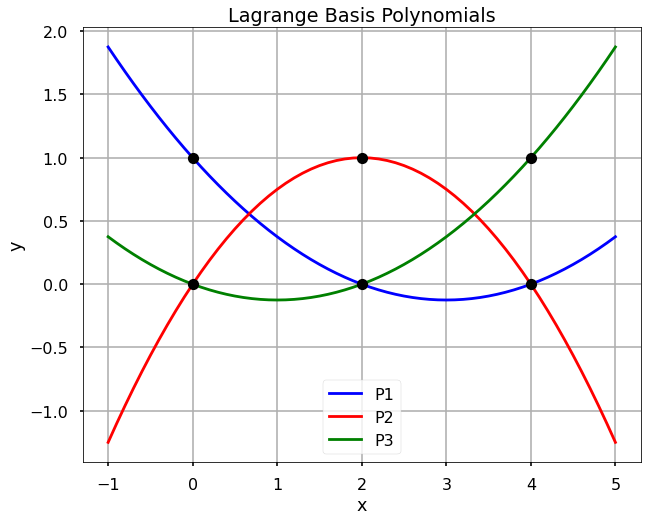

In [ ]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

x = [0, 2, 4]
y = [2, 5, 3]
P1_coeff = [1,-3/4,1/8]   #P1(x)=(1/8)x^2-(3/4)x+1
P2_coeff = [0, 1,-1/4]    #P2(x)=(1/4)x^2+x
P3_coeff = [0,-1/4,1/8]   #P3(x)=(1/48)x^2-(1/4)x

# get the polynomial function
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-1.0, 5.1, 0.1)  #makes array from -1 to 5.1 in increments of 0.1

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

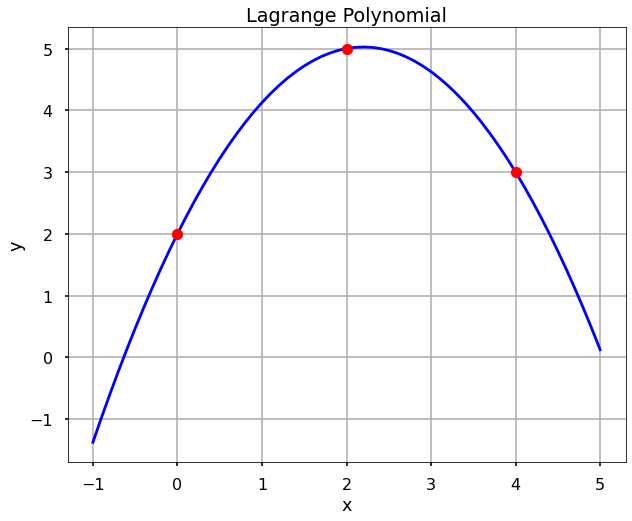

In [ ]:
L = 2*P1 + 5*P2 + 3*P3  # y1*P1 + y2*P2 +y3*P3

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()



Instead of doing all that work, the package scripy allows you do all the calculations and graphing with only the x and y coordinates given in a couple of lines of code 

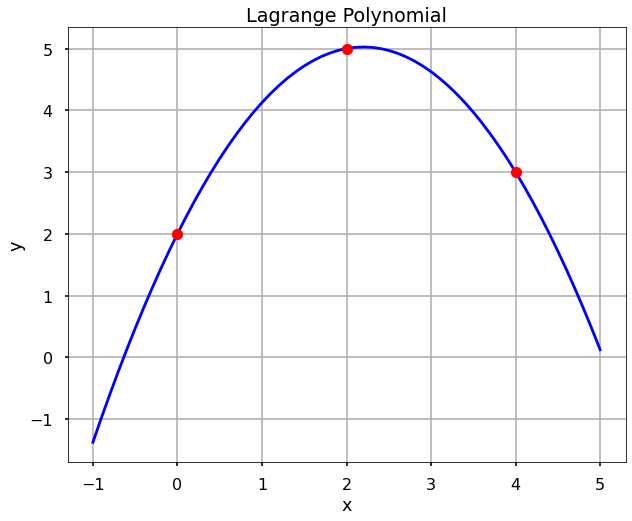

In [ ]:
from scipy.interpolate import lagrange

f = lagrange(x, y)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**17.4: Newton’s Polynomial Interpolation**

Example 2: Calculate the divided differences table for x = [0, 2, 4, 7] and y = [2, 5, 3, 4]

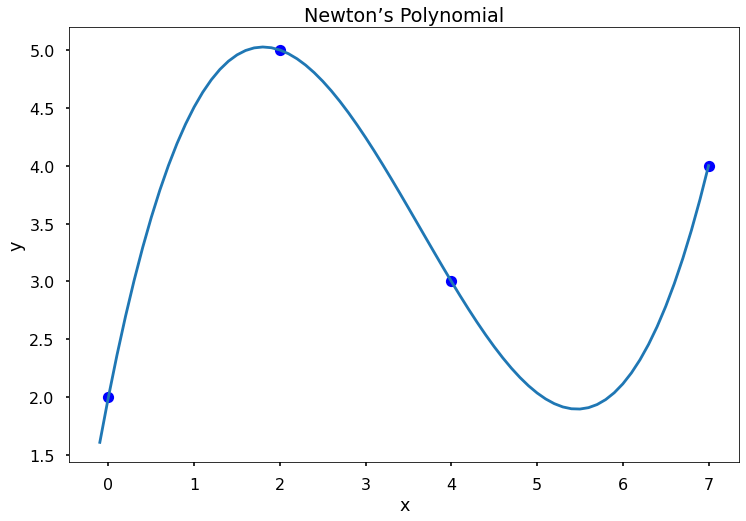

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

x = np.array([0, 2, 4, 7])
y = np.array([2, 5, 3, 4])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-.1, 7.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)
plt.title('Newton’s Polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.show()